In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from math import inf
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import Isomap, MDS

In [3]:
%run data_loader.ipynb

corpus = [
    headline for headline in df["headline"]
    if not pd.isnull(headline)
]

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

vectorizer = TfidfVectorizer()

Text(0.5,1,'headline')

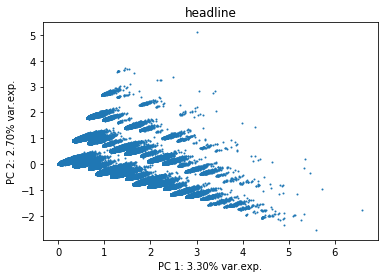

In [11]:
pca = TruncatedSVD(n_components=2)
Z = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
plt.ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
plt.title("headline")

Text(0.5,0.92,'headline')

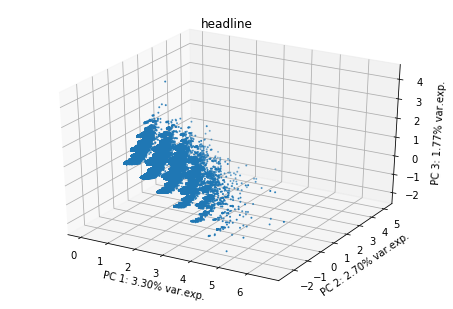

In [12]:
pca = TruncatedSVD(n_components=3)
Z = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
ax.set_xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
ax.set_ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
ax.set_zlabel("PC 3: " + "{:.2%}".format(variances[2]) + " var.exp.")
plt.title("headline")

In [ ]:
# TODO: PCA and MDS after feature selection

In [6]:
isomap = Isomap(n_components=2, n_jobs=-1)
Z = isomap.fit_transform(X)

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.title("headline (ISOMAP, n_components=2)")

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
isomap = Isomap(n_components=3, n_jobs=-1)
Z = isomap.fit_transform(X)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
plt.title("headline (ISOMAP, n_components=3)")